## Assignment 4 Block 3 Complex systems in Bioinformatics SoSe24
Petko Antonov, Hyunchang Oh

### Task 1

/tmp/ipykernel_62430/4189456001.py:10: RuntimeWarning: invalid value encountered in divide
  W = adj_matrix / adj_matrix.sum(axis=1, keepdims=True)


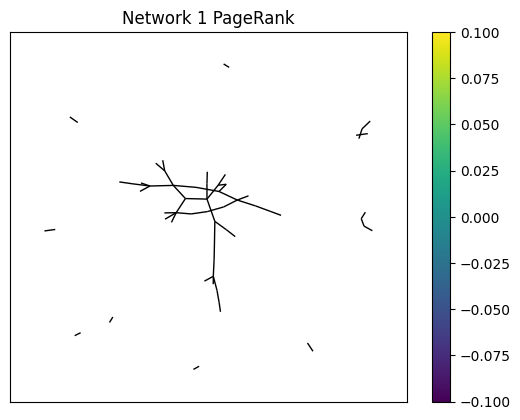

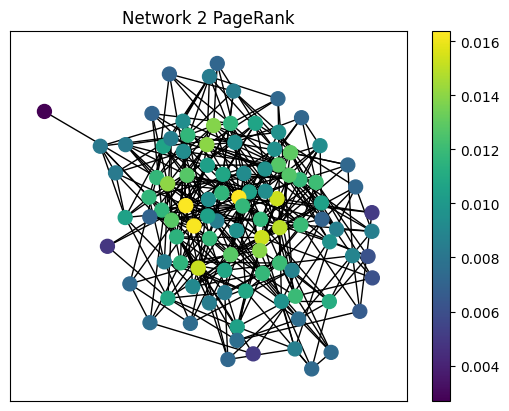

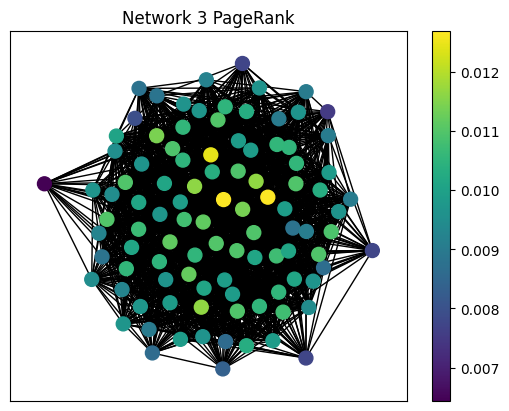

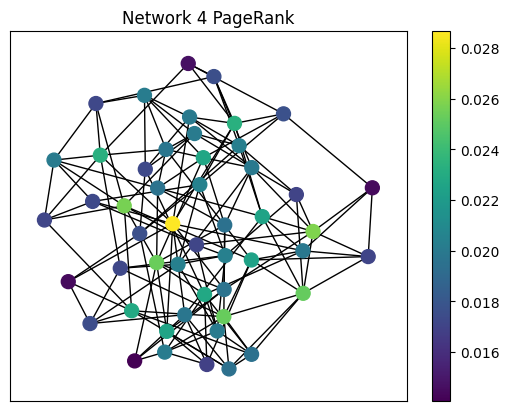

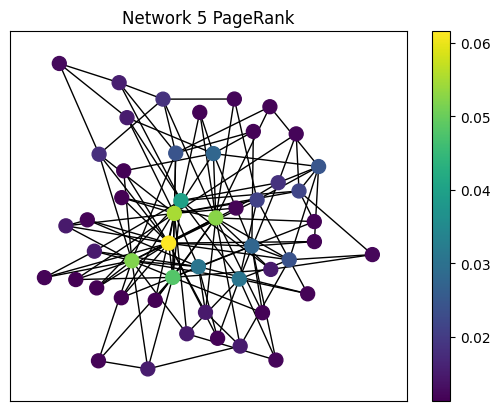

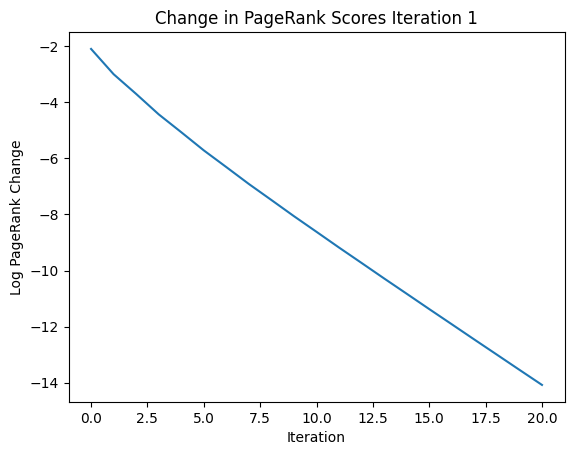

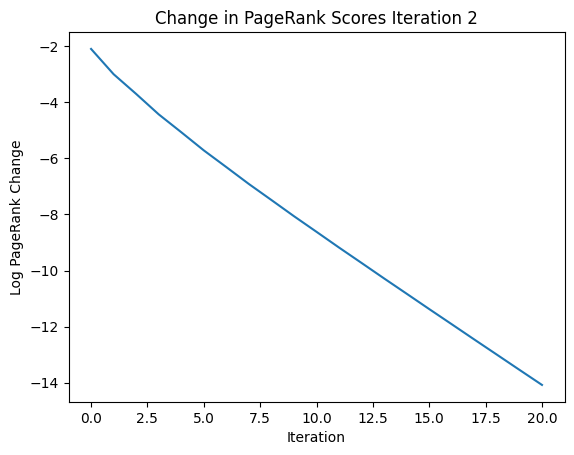

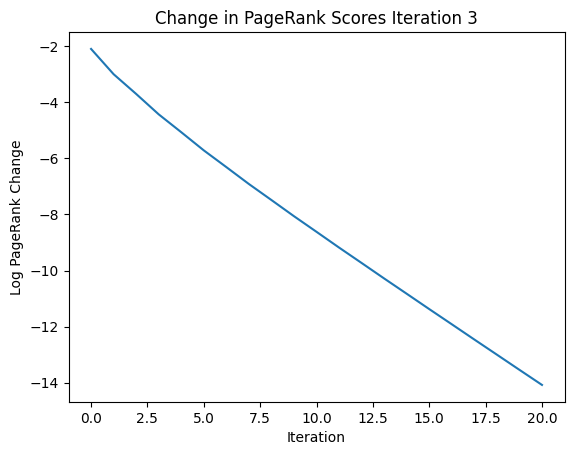

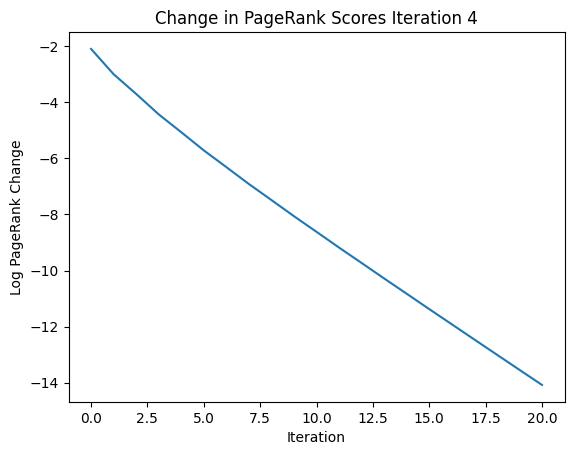

Direct solution PageRank values: [0.04817472 0.02763579 0.0112753  0.04009714 0.054966   0.06154267
 0.05265124 0.05194554 0.02402847 0.01795809 0.03079762 0.01129862
 0.02755052 0.01480893 0.03082062 0.01144007 0.02114007 0.01157272
 0.01132334 0.01481228 0.01459401 0.01123781 0.02469858 0.01176312
 0.01464917 0.0243512  0.0184806  0.01843713 0.01193364 0.01507101
 0.01481757 0.01168864 0.01199587 0.01166044 0.02175952 0.01214724
 0.0154941  0.01196521 0.01163584 0.01501261 0.01178836 0.01498742
 0.01254796 0.0114633  0.01135305 0.01175314 0.01156455 0.01182048
 0.01181434 0.01167433]
Iterative solution PageRank values: [0.04817471 0.02763584 0.01127529 0.04009726 0.05496601 0.06154275
 0.0526513  0.05194555 0.02402839 0.01795806 0.03079764 0.01129861
 0.02755052 0.01480889 0.03082067 0.01144007 0.02114004 0.01157271
 0.01132332 0.01481226 0.01459401 0.01123781 0.02469868 0.01176311
 0.01464914 0.02435123 0.01848062 0.01843706 0.01193364 0.01507098
 0.01481757 0.01168861 0.01199586 0.

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

# Subproblem 1: Implement the PageRank algorithm with power iteration
def pagerank_power_iteration(adj_matrix, alpha=0.85, tol=1.0e-6):
    n = adj_matrix.shape[0]
    E = np.ones((n, n)) / n
    W = adj_matrix / adj_matrix.sum(axis=1, keepdims=True)
    pt = np.ones(n) / n
    pt_prev = np.zeros(n)
    iteration_diffs = []
    
    while np.linalg.norm(pt - pt_prev) > tol:
        pt_prev = pt
        pt = ((1 - alpha) / n + alpha * W.T).dot(pt_prev)
        iteration_diffs.append(np.linalg.norm(pt - pt_prev))
    
    return pt, iteration_diffs

# Subproblem 2: Implement the Random Walk with Restart (RWR) process
def rwr(adj_matrix, alpha_rw=0.15, max_iter=100, tol=1e-6):
    n = adj_matrix.shape[0]
    W = adj_matrix / adj_matrix.sum(axis=1, keepdims=True)
    r = np.ones(n) / n
    p = r.copy()
    iteration_diffs = []

    for i in range(max_iter):
        p_prev = p.copy()
        p = (1 - alpha_rw) * W.T.dot(p) + alpha_rw * r
        iteration_diffs.append(np.linalg.norm(p - p_prev))
        if np.linalg.norm(p - p_prev) < tol:
            break
            
    return p, iteration_diffs

# Subproblem 3: Create random networks using NetworkX
def create_random_networks(seed=42):
    np.random.seed(seed)
    G_erdos_renyi1 = nx.erdos_renyi_graph(100, 0.01, seed=seed)
    G_erdos_renyi2 = nx.erdos_renyi_graph(100, 0.08, seed=seed)
    G_erdos_renyi3 = nx.erdos_renyi_graph(100, 0.4, seed=seed)
    G_watts_strogatz = nx.watts_strogatz_graph(50, 7, 0.3, seed=seed)
    G_barabasi_albert = nx.barabasi_albert_graph(50, 3, seed=seed)
    
    return [G_erdos_renyi1, G_erdos_renyi2, G_erdos_renyi3, G_watts_strogatz, G_barabasi_albert]

# Subproblem 4: Calculate the PageRank using your implementation
def calculate_pagerank_for_networks(networks):
    pagerank_values = []
    for G in networks:
        adj_matrix = nx.to_numpy_array(G)
        pr, _ = pagerank_power_iteration(adj_matrix)
        pagerank_values.append(pr)
    return pagerank_values

# Subproblem 5: Plot the networks with PageRank values
def plot_networks(networks, pagerank_values):
    for i, (G, pr) in enumerate(zip(networks, pagerank_values)):
        plt.figure(i)
        pos = nx.spring_layout(G, seed=42)
        nodes = nx.draw_networkx_nodes(G, pos, node_size=100, node_color=pr, cmap=cm.viridis)
        edges = nx.draw_networkx_edges(G, pos)
        plt.colorbar(nodes)
        plt.title(f"Network {i+1} PageRank")
        plt.show()

# Subproblem 6: Propagate scores in Barabasi-Albert network with RWR
def propagate_scores_rwr(G):
    adj_matrix = nx.to_numpy_array(G)
    initial_probs = np.zeros(G.number_of_nodes())
    np.random.seed(42)
    initial_probs[np.random.choice(G.number_of_nodes(), 3, replace=False)] = [0.4, 0.1, 0.5]
    pr, iteration_diffs = rwr(adj_matrix, alpha_rw=0.15, max_iter=100, tol=1e-6)
    return pr, iteration_diffs

# Subproblem 7: Identify the largest changes in scores
def plot_largest_changes_in_scores(G):
    adj_matrix = nx.to_numpy_array(G)
    initial_probs = np.zeros(G.number_of_nodes())
    np.random.seed(42)
    initial_probs[np.random.choice(G.number_of_nodes(), 3, replace=False)] = [0.4, 0.1, 0.5]
    pr, iteration_diffs = rwr(adj_matrix, alpha_rw=0.15, max_iter=100, tol=1e-6)
    
    for i in range(4):
        plt.figure(i)
        plt.plot(range(len(iteration_diffs)), np.log(iteration_diffs))
        plt.title(f"Change in PageRank Scores Iteration {i+1}")
        plt.xlabel("Iteration")
        plt.ylabel("Log PageRank Change")
        plt.show()

# Subproblem 8: Propagation using direct solution
def rwr_direct_solution(adj_matrix, alpha_rw=0.15):
    n = adj_matrix.shape[0]
    W = adj_matrix / adj_matrix.sum(axis=1, keepdims=True)
    I = np.eye(n)
    r = np.ones(n) / n
    p = np.linalg.inv(I - (1 - alpha_rw) * W.T).dot(alpha_rw * r)
    return p

# Run the entire process
if __name__ == "__main__":
    networks = create_random_networks()
    pagerank_values = calculate_pagerank_for_networks(networks)
    plot_networks(networks, pagerank_values)
    
    G_barabasi_albert = networks[-1]
    pr_rwr, iteration_diffs_rwr = propagate_scores_rwr(G_barabasi_albert)
    plot_largest_changes_in_scores(G_barabasi_albert)
    
    pr_direct = rwr_direct_solution(nx.to_numpy_array(G_barabasi_albert))
    print("Direct solution PageRank values:", pr_direct)
    print("Iterative solution PageRank values:", pr_rwr)


### No its not exactly the same but only because we limited it to e-6 decimals 